## Plot cross-section vs couplings

For a study plot the cross-sections divided by the coupling values. Extract the coupling values from the samplename.
More information here: https://cernbox.cern.ch/index.php/s/1cULBBLUpylGAlX

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# raw cross-section data from MG5 + Pythia log files
# link to job options: https://gitlab.cern.ch/pgadow/monoHbbSignalStudy/tree/master/JobOptions
data = """
dsid,samplename,mzp,mdm,mdh,xsec_pb,factor,filter
600035,MadGraphPy8EG_A14NNP23LO_monoSbb_zp500_dm100_dh70q0p01x0p5,500,100,70,0.0051388,1.0,0.76235328
600036,MadGraphPy8EG_A14NNP23LO_monoSbb_zp2000_dm100_dh70q0p01x0p5,2000,100,70,6.626e-05,1.0,0.9092245800000001
600037,MadGraphPy8EG_A14NNP23LO_monoSbb_zp500_dm100_dh70q0p1x0p5,500,100,70,0.18454,1.0,0.76299008
600038,MadGraphPy8EG_A14NNP23LO_monoSbb_zp2000_dm100_dh70q0p1x0p5,2000,100,70,0.002672,1.0,0.90760654
600039,MadGraphPy8EG_A14NNP23LO_monoSbb_zp500_dm100_dh70q0p25x0p5,500,100,70,0.25858,1.0,0.76805518
600040,MadGraphPy8EG_A14NNP23LO_monoSbb_zp2000_dm100_dh70q0p25x0p5,2000,100,70,0.0035948,1.0,0.9237305000000001
600041,MadGraphPy8EG_A14NNP23LO_monoSbb_zp500_dm100_dh70q0p01x1p0,500,100,70,0.020801999999999998,1.0,0.7640666599999999
600042,MadGraphPy8EG_A14NNP23LO_monoSbb_zp2000_dm100_dh70q0p01x1p0,2000,100,70,0.00025973999999999995,1.0,0.9096419600000001
600043,MadGraphPy8EG_A14NNP23LO_monoSbb_zp500_dm100_dh70q0p1x1p0,500,100,70,1.4297999999999997,1.0,0.7654147
600044,MadGraphPy8EG_A14NNP23LO_monoSbb_zp2000_dm100_dh70q0p1x1p0,2000,100,70,0.018788,1.0,0.9147366800000001
600045,MadGraphPy8EG_A14NNP23LO_monoSbb_zp500_dm100_dh70q0p25x1p0,500,100,70,3.2861999999999996,1.0,0.7683142999999999
600046,MadGraphPy8EG_A14NNP23LO_monoSbb_zp2000_dm100_dh70q0p25x1p0,2000,100,70,0.041346,1.0,0.9320396800000001
600047,MadGraphPy8EG_A14NNP23LO_monoSbb_zp500_dm100_dh70q0p01x1p5,500,100,70,0.046852,1.0,0.7672019999999999
600048,MadGraphPy8EG_A14NNP23LO_monoSbb_zp2000_dm100_dh70q0p01x1p5,2000,100,70,0.00053954,1.0,0.9201912200000001
600049,MadGraphPy8EG_A14NNP23LO_monoSbb_zp500_dm100_dh70q0p1x1p5,500,100,70,3.8724,1.0,0.77018098
600050,MadGraphPy8EG_A14NNP23LO_monoSbb_zp2000_dm100_dh70q0p1x1p5,2000,100,70,0.04502199999999999,1.0,0.9253383
600051,MadGraphPy8EG_A14NNP23LO_monoSbb_zp500_dm100_dh70q0p25x1p5,500,100,70,12.431999999999999,1.0,0.77068936
600052,MadGraphPy8EG_A14NNP23LO_monoSbb_zp2000_dm100_dh70q0p25x1p5,2000,100,70,0.13466,1.0,0.93884452
"""
# store as csv file to allow easy read-in by pandas
with open('data.csv', 'w') as f:
    f.write(data)

In [4]:
# read raw data to pandas dataframe
dataframe = pd.read_csv('data.csv')

In [5]:
# augment data with gq and gx values extracted from file name
def get_gq(row):
    samplename = row['samplename']
    couplingstring = samplename[samplename.find('q'):].replace('p', '.')
    gq = float(couplingstring[couplingstring.find('q')+1:couplingstring.find('x')])
    return gq
def get_gx(row):
    samplename = row['samplename']
    couplingstring = samplename[samplename.find('q'):].replace('p', '.')
    gx = float(couplingstring[couplingstring.find('x')+1:])
    return gx
dataframe['gq'] = dataframe.apply(get_gq, axis=1)
dataframe['gx'] = dataframe.apply(get_gx, axis=1)

# compute cross-section normalised to coupling values
# assume amplitude squared:  A 2 ( g χ )   ~   |D 1 (g χ )  + D 2 (g χ )  | 2     ~    g q 2 g χ 4 
# with scaling parameter:    r = (g χ new /g χ old ) 4
# see here for justification of coupling scaling: https://cernbox.cern.ch/index.php/s/1cULBBLUpylGAlX
def get_xsec_normgq(row):
    xsec = row['xsec_pb']
    gq = row['gq']
    return xsec / gq**2
def get_xsec_normgx(row):
    xsec = row['xsec_pb']
    gx = row['gx']
    return xsec / gx**4
def get_xsec_normgqgx(row):
    xsec = row['xsec_pb']
    gx = row['gx']
    gq = row['gq']
    return xsec / (gx**4 * gq**2)
dataframe['xsec_pb_normgq'] = dataframe.apply(get_xsec_normgq, axis=1)
dataframe['xsec_pb_normgx'] = dataframe.apply(get_xsec_normgx, axis=1)
dataframe['xsec_pb_normgqgx'] = dataframe.apply(get_xsec_normgqgx, axis=1)

In [11]:
dataframe

,dsid,samplename,mzp,mdm,mdh,xsec_pb,factor,filter,gq,gx,xsec_pb_normgq,xsec_pb_normgx,xsec_pb_normgqgx
0,600035,MadGraphPy8EG_A14NNP23LO_monoSbb_zp500_dm100_d...,500,100,70,0.005139,1.0,0.762353,0.01,0.5,51.388000,0.082221,822.208000
1,600036,MadGraphPy8EG_A14NNP23LO_monoSbb_zp2000_dm100_...,2000,100,70,0.000066,1.0,0.909225,0.01,0.5,0.662600,0.001060,10.601600
2,600037,MadGraphPy8EG_A14NNP23LO_monoSbb_zp500_dm100_d...,500,100,70,0.184540,1.0,0.762990,0.10,0.5,18.454000,2.952640,295.264000
3,600038,MadGraphPy8EG_A14NNP23LO_monoSbb_zp2000_dm100_...,2000,100,70,0.002672,1.0,0.907607,0.10,0.5,0.267200,0.042752,4.275200
4,600039,MadGraphPy8EG_A14NNP23LO_monoSbb_zp500_dm100_d...,500,100,70,0.258580,1.0,0.768055,0.25,0.5,4.137280,4.137280,66.196480
5,600040,MadGraphPy8EG_A14NNP23LO_monoSbb_zp2000_dm100_...,2000,100,70,0.003595,1.0,0.923731,0.25,0.5,0.057517,0.057517,0.920269
6,600041,MadGraphPy8EG_A14NNP23LO_monoSbb_zp500_dm100_d...,500,100,70,0.020802,1.0,0.764067,0.01,1.0,208.020000,0.020802,208.020000
7,600042,MadGraphPy8EG_A14NNP23LO_monoSbb_zp2000_dm100_...,2000,100,70,0.000260,1.0,0.909642,0.01,1.0,2.597400,0.000260,2.597400
8,600043,MadGraphPy8EG_A14NNP23LO_monoSbb_zp500_dm100_d...,500,100,70,1.429800,1.0,0.765415,0.10,1.0,142.980000,1.429800,142.980000
9,600044,MadGraphPy8EG_A14NNP23LO_monoSbb_zp2000_dm100_...,2000,100,70,0.018788,1.0,0.914737,0.10,1.0,1.878800,0.018788,1.878800


In [12]:
# subselect mzp 500 GeV
dataframe_mzp500 =dataframe.loc[(dataframe['mzp'] == 500)]
dataframe_mzp500

,dsid,samplename,mzp,mdm,mdh,xsec_pb,factor,filter,gq,gx,xsec_pb_normgq,xsec_pb_normgx,xsec_pb_normgqgx
0,600035,MadGraphPy8EG_A14NNP23LO_monoSbb_zp500_dm100_d...,500,100,70,0.005139,1.0,0.762353,0.01,0.5,51.38800,0.082221,822.208000
2,600037,MadGraphPy8EG_A14NNP23LO_monoSbb_zp500_dm100_d...,500,100,70,0.184540,1.0,0.762990,0.10,0.5,18.45400,2.952640,295.264000
4,600039,MadGraphPy8EG_A14NNP23LO_monoSbb_zp500_dm100_d...,500,100,70,0.258580,1.0,0.768055,0.25,0.5,4.13728,4.137280,66.196480
6,600041,MadGraphPy8EG_A14NNP23LO_monoSbb_zp500_dm100_d...,500,100,70,0.020802,1.0,0.764067,0.01,1.0,208.02000,0.020802,208.020000
8,600043,MadGraphPy8EG_A14NNP23LO_monoSbb_zp500_dm100_d...,500,100,70,1.429800,1.0,0.765415,0.10,1.0,142.98000,1.429800,142.980000
10,600045,MadGraphPy8EG_A14NNP23LO_monoSbb_zp500_dm100_d...,500,100,70,3.286200,1.0,0.768314,0.25,1.0,52.57920,3.286200,52.579200
12,600047,MadGraphPy8EG_A14NNP23LO_monoSbb_zp500_dm100_d...,500,100,70,0.046852,1.0,0.767202,0.01,1.5,468.52000,0.009255,92.547160
14,600049,MadGraphPy8EG_A14NNP23LO_monoSbb_zp500_dm100_d...,500,100,70,3.872400,1.0,0.770181,0.10,1.5,387.24000,0.764919,76.491852
16,600051,MadGraphPy8EG_A14NNP23LO_monoSbb_zp500_dm100_d...,500,100,70,12.432000,1.0,0.770689,0.25,1.5,198.91200,2.455704,39.291259


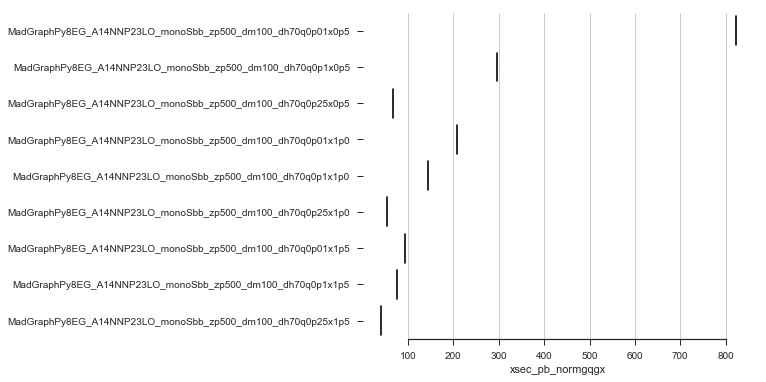

In [8]:
# plot result
sns.set(style="ticks")
f, ax = plt.subplots(figsize=(7, 6))

sns.boxplot(x="xsec_pb_normgqgx", y="samplename", data=dataframe_mzp500,
            whis="range", palette=sns.color_palette("GnBu_d"))

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

In [13]:
# subselect mzp 2000 GeV
dataframe_mzp2000 =dataframe.loc[(dataframe['mzp'] == 2000)]
dataframe_mzp2000

,dsid,samplename,mzp,mdm,mdh,xsec_pb,factor,filter,gq,gx,xsec_pb_normgq,xsec_pb_normgx,xsec_pb_normgqgx
1,600036,MadGraphPy8EG_A14NNP23LO_monoSbb_zp2000_dm100_...,2000,100,70,0.000066,1.0,0.909225,0.01,0.5,0.662600,0.001060,10.601600
3,600038,MadGraphPy8EG_A14NNP23LO_monoSbb_zp2000_dm100_...,2000,100,70,0.002672,1.0,0.907607,0.10,0.5,0.267200,0.042752,4.275200
5,600040,MadGraphPy8EG_A14NNP23LO_monoSbb_zp2000_dm100_...,2000,100,70,0.003595,1.0,0.923731,0.25,0.5,0.057517,0.057517,0.920269
7,600042,MadGraphPy8EG_A14NNP23LO_monoSbb_zp2000_dm100_...,2000,100,70,0.000260,1.0,0.909642,0.01,1.0,2.597400,0.000260,2.597400
9,600044,MadGraphPy8EG_A14NNP23LO_monoSbb_zp2000_dm100_...,2000,100,70,0.018788,1.0,0.914737,0.10,1.0,1.878800,0.018788,1.878800
11,600046,MadGraphPy8EG_A14NNP23LO_monoSbb_zp2000_dm100_...,2000,100,70,0.041346,1.0,0.932040,0.25,1.0,0.661536,0.041346,0.661536
13,600048,MadGraphPy8EG_A14NNP23LO_monoSbb_zp2000_dm100_...,2000,100,70,0.000540,1.0,0.920191,0.01,1.5,5.395400,0.000107,1.065758
15,600050,MadGraphPy8EG_A14NNP23LO_monoSbb_zp2000_dm100_...,2000,100,70,0.045022,1.0,0.925338,0.10,1.5,4.502200,0.008893,0.889323
17,600052,MadGraphPy8EG_A14NNP23LO_monoSbb_zp2000_dm100_...,2000,100,70,0.134660,1.0,0.938845,0.25,1.5,2.154560,0.026600,0.425592


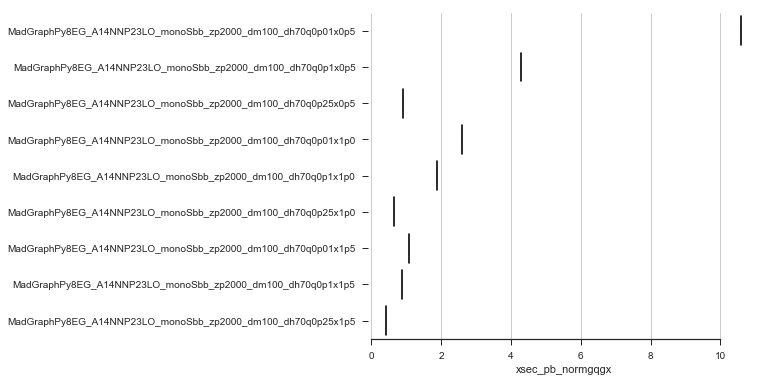

In [10]:
# plot result
sns.set(style="ticks")
f, ax = plt.subplots(figsize=(7, 6))

sns.boxplot(x="xsec_pb_normgqgx", y="samplename", data=dataframe_mzp2000,
            whis="range", palette=sns.color_palette("GnBu_d"))

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)